In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 500,100
import seaborn as sns
from math import sqrt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from google.colab import drive
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn import metrics
from datetime import datetime
from datetime import date, datetime
from matplotlib import dates as mdates

In [2]:
drive.mount('/content/drive',force_remount=True)
data = pd.read_csv('/content/drive/MyDrive/D2/US_counties_COVID19_health_weather_data.csv')

Mounted at /content/drive


In [3]:
data.shape
num_fips = len(data['fips'].unique())
num_fips

3140

In [4]:
covid = data[(data['fips']=='53061')]
covid.shape

(319, 227)

In [5]:
covid.head()

,date,county,state,fips,cases,deaths,stay_at_home_announced,stay_at_home_effective,lat,lon,...,min_temp_3d_avg,min_temp_5d_avg,min_temp_10d_avg,min_temp_15d_avg,dewpoint_3d_avg,dewpoint_5d_avg,dewpoint_10d_avg,dewpoint_15d_avg,date_stay_at_home_announced,date_stay_at_home_effective
0,2020-01-21,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,38.266667,38.92,38.44,36.146667,40.333333,41.64,40.74,37.973333,2020-03-23,2020-03-23
1,2020-01-22,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,39.233333,41.12,39.76,37.613333,42.633333,42.98,41.68,39.440000,2020-03-23,2020-03-23
2,2020-01-23,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,42.900000,41.74,41.15,38.226667,44.733333,43.72,42.47,40.120000,2020-03-23,2020-03-23
4,2020-01-24,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,44.600000,42.54,41.75,38.226667,46.000000,44.30,42.88,41.293333,2020-03-23,2020-03-23
7,2020-01-25,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,44.000000,43.38,40.78,39.166667,44.633333,44.28,42.55,42.280000,2020-03-23,2020-03-23


In [6]:
covid['date'] = pd.to_datetime(covid['date'], infer_datetime_format=True)
dataset = covid.set_index(['date'])
dataset.head(50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,county,state,fips,cases,deaths,stay_at_home_announced,stay_at_home_effective,lat,lon,total_population,...,min_temp_3d_avg,min_temp_5d_avg,min_temp_10d_avg,min_temp_15d_avg,dewpoint_3d_avg,dewpoint_5d_avg,dewpoint_10d_avg,dewpoint_15d_avg,date_stay_at_home_announced,date_stay_at_home_effective
date,,,,,,,,,,,,,,,,,,,,,
2020-01-21,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,758649.0,...,38.266667,38.92,38.44,36.146667,40.333333,41.64,40.74,37.973333,2020-03-23,2020-03-23
2020-01-22,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,758649.0,...,39.233333,41.12,39.76,37.613333,42.633333,42.98,41.68,39.440000,2020-03-23,2020-03-23
2020-01-23,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,758649.0,...,42.900000,41.74,41.15,38.226667,44.733333,43.72,42.47,40.120000,2020-03-23,2020-03-23
2020-01-24,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,758649.0,...,44.600000,42.54,41.75,38.226667,46.000000,44.30,42.88,41.293333,2020-03-23,2020-03-23
2020-01-25,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,758649.0,...,44.000000,43.38,40.78,39.166667,44.633333,44.28,42.55,42.280000,2020-03-23,2020-03-23
2020-01-26,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,758649.0,...,42.033333,43.38,40.17,39.013333,42.500000,43.30,43.35,42.020000,2020-03-23,2020-03-23
2020-01-27,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,758649.0,...,41.966667,42.38,40.68,38.346667,41.933333,42.78,43.88,41.366667,2020-03-23,2020-03-23
2020-01-28,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,758649.0,...,42.633333,39.82,39.06,37.486667,42.200000,41.38,42.21,40.620000,2020-03-23,2020-03-23
2020-01-29,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,758649.0,...,38.666667,37.80,36.96,36.820000,41.166667,42.40,40.56,40.380000,2020-03-23,2020-03-23


In [7]:
dataset = dataset[['cases']]
dataset.tail(5)
dataset.shape

(319, 1)

In [8]:
dataR = dataset
print(dataR)

            cases
date             
2020-01-21      1
2020-01-22      1
2020-01-23      1
2020-01-24      1
2020-01-25      1
...           ...
2020-11-30  15973
2020-12-01  16234
2020-12-02  16523
2020-12-03  16678
2020-12-04  16894

[319 rows x 1 columns]


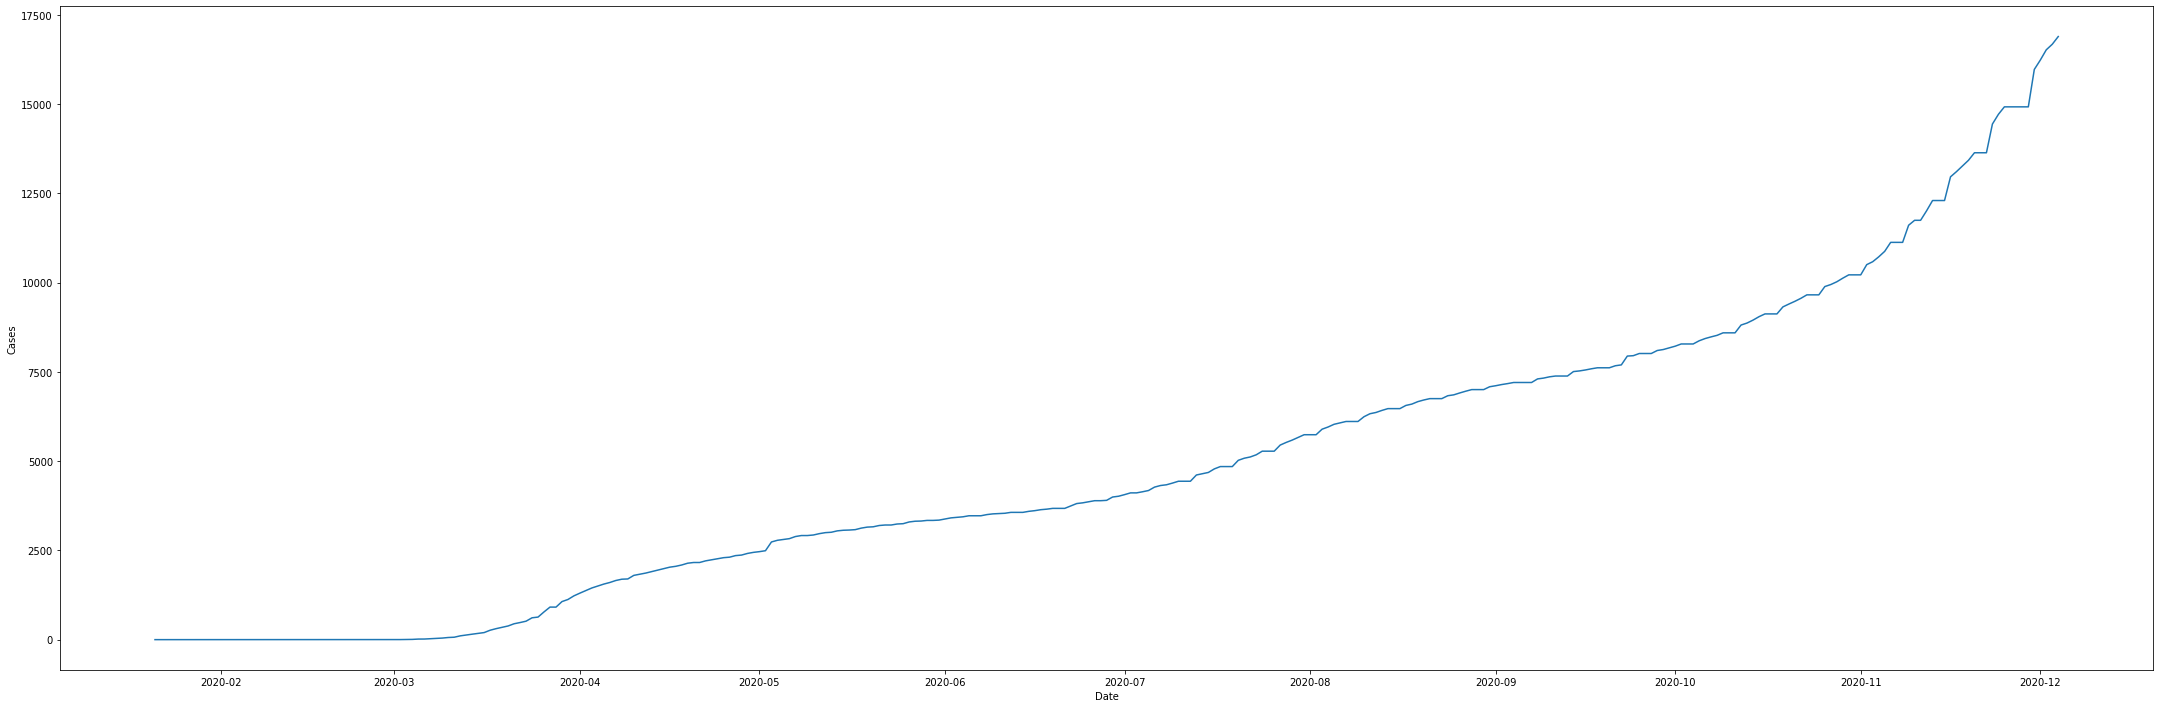

In [9]:
plt.subplots(1, 1, figsize=(30, 10))
plt.xlabel("Date")
plt.ylabel("Cases")
plt.tight_layout()
plt.plot(dataset)

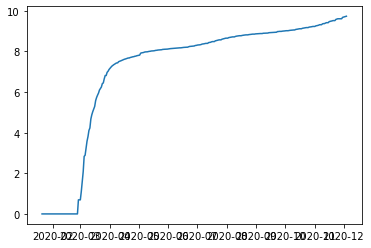

In [10]:
#Estimating trend
logScale = np.log(dataset)
plt.plot(logScale)

In [11]:
dataset=logScale
dataset.tail()

,cases
date,
2020-11-30,9.678655
2020-12-01,9.694863
2020-12-02,9.712509
2020-12-03,9.721846
2020-12-04,9.734714


In [12]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [13]:
# fix random seed for reproducibility
np.random.seed(7)

In [14]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
print(dataset)

[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.07120365]
 [0.07120365]
 [0.07120365]
 [0.11285512]
 [0.16532976]
 [0.21361096]
 [0.29104228]
 [0.29691389]
 [0.33468848]
 [0.36811754]
 [0.39104   ]
 [0.42229016]
 [0.43494925]
 [0.48001707]
 [0.50158659]
 [0.51742174]
 [0.53055345]
 [0.54375557]
 [0.57317862]
 [0.58895838]
 [0.6008728 ]
 [0.61128069]
 [0.62665622]
 [0.63420314]
 [0.64202969]
 [0.65932754]
 [0.66262558]
 [0.68381327]
 [0.70025026]
 [0.70013769]
 [0.71626207]
 [0.72179079]
 [0.73069864]
 [0.73

In [15]:
# split into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(data),:]
print(len(train), len(test))

255 64


In [16]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [17]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [18]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [19]:
print(trainX)

[[[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.07120365]]

 [[0.07120365]]

 [[0.07120365]]

 [[0.11285512]]

 [[0.16532976]]

 [[0.21361096]]

 [[0.29104228]]

 [[0.29691389]]

 [[0.33468848]]

 [[0.36811754]]

 [[0.39104   ]]

 [[0.42229016]]

 [[0.43494925]]

 [[0.48001707]]

 [[0.50158659]]

 [[0.51742174]]

 [[0.53055345]]

 [[0.54375557]]

 [[0.57317862]]

 [[0.58895838]]

 [[0.6008728 ]

In [20]:
print(trainY)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.07120365 0.07120365 0.07120365 0.11285512 0.16532976
 0.21361096 0.29104228 0.29691389 0.33468848 0.36811754 0.39104
 0.42229016 0.43494925 0.48001707 0.50158659 0.51742174 0.53055345
 0.54375557 0.57317862 0.58895838 0.6008728  0.61128069 0.62665622
 0.63420314 0.64202969 0.65932754 0.66262558 0.68381327 0.70025026
 0.70013769 0.71626207 0.72179079 0.73069864 0.73686724 0.74231345
 0.7476983  0.75138858 0.75514888 0.75800977 0.76153932 0.76374591
 0.76416952 0.77003777 0.77190299 0.7736799  0.77591255 0.77815043
 0.780134   0.78238392 0.78359069 0.78542379 0.7878501  0.7888048
 0.7888048  0.79096752 0.79239973 0.7936764  0.

In [21]:
print(testX)

[[[0.9267823 ]]

 [[0.9267823 ]]

 [[0.9267823 ]]

 [[0.92788019]]

 [[0.92865031]]

 [[0.92922111]]

 [[0.92974056]]

 [[0.93058061]]

 [[0.93058061]]

 [[0.93058061]]

 [[0.93315359]]

 [[0.93380427]]

 [[0.93474967]]

 [[0.93584554]]

 [[0.9367274 ]]

 [[0.9367274 ]]

 [[0.9367274 ]]

 [[0.93892154]]

 [[0.93979935]]

 [[0.94062638]]

 [[0.94153278]]

 [[0.94256961]]

 [[0.94256961]]

 [[0.94256961]]

 [[0.94500781]]

 [[0.94559809]]

 [[0.94639015]]

 [[0.94741991]]

 [[0.94835906]]

 [[0.94835906]]

 [[0.94835906]]

 [[0.95119454]]

 [[0.95199328]]

 [[0.95330448]]

 [[0.95476929]]

 [[0.95712209]]

 [[0.95712209]]

 [[0.95712209]]

 [[0.96145979]]

 [[0.96267372]]

 [[0.96267372]]

 [[0.96497389]]

 [[0.96740757]]

 [[0.96740757]]

 [[0.96740757]]

 [[0.97280813]]

 [[0.97395846]]

 [[0.97518899]]

 [[0.97641261]]

 [[0.97801423]]

 [[0.97801423]]

 [[0.97801423]]

 [[0.98389797]]

 [[0.98581457]]

 [[0.98727021]]

 [[0.98727021]]

 [[0.98727021]]

 [[0.98727021]]

 [[0.98727021]

In [22]:
print(testY)

[0.9267823  0.9267823  0.92788019 0.92865031 0.92922111 0.92974056
 0.93058061 0.93058061 0.93058061 0.93315359 0.93380427 0.93474967
 0.93584554 0.9367274  0.9367274  0.9367274  0.93892154 0.93979935
 0.94062638 0.94153278 0.94256961 0.94256961 0.94256961 0.94500781
 0.94559809 0.94639015 0.94741991 0.94835906 0.94835906 0.94835906
 0.95119454 0.95199328 0.95330448 0.95476929 0.95712209 0.95712209
 0.95712209 0.96145979 0.96267372 0.96267372 0.96497389 0.96740757
 0.96740757 0.96740757 0.97280813 0.97395846 0.97518899 0.97641261
 0.97801423 0.97801423 0.97801423 0.98389797 0.98581457 0.98727021
 0.98727021 0.98727021 0.98727021 0.98727021 0.99424136 0.99590633
 0.99771897 0.99867813]


In [23]:
datasetL = dataset
datasetS = dataset
datasetB = dataset

In [24]:
trainXL= trainX

In [25]:
trainYL= trainY

In [26]:
testXL= testX

In [27]:
testYL= testY

In [28]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainXL, trainYL, epochs=500, batch_size=1, verbose=2)

Epoch 1/500
253/253 - 7s - loss: 0.2976 - 7s/epoch - 29ms/step
Epoch 2/500
253/253 - 1s - loss: 0.0632 - 681ms/epoch - 3ms/step
Epoch 3/500
253/253 - 1s - loss: 0.0300 - 1s/epoch - 4ms/step
Epoch 4/500
253/253 - 1s - loss: 0.0170 - 602ms/epoch - 2ms/step
Epoch 5/500
253/253 - 1s - loss: 0.0076 - 584ms/epoch - 2ms/step
Epoch 6/500
253/253 - 1s - loss: 0.0023 - 553ms/epoch - 2ms/step
Epoch 7/500
253/253 - 1s - loss: 4.7787e-04 - 573ms/epoch - 2ms/step
Epoch 8/500
253/253 - 1s - loss: 1.5265e-04 - 554ms/epoch - 2ms/step
Epoch 9/500
253/253 - 1s - loss: 1.1912e-04 - 584ms/epoch - 2ms/step
Epoch 10/500
253/253 - 1s - loss: 1.1776e-04 - 557ms/epoch - 2ms/step
Epoch 11/500
253/253 - 1s - loss: 1.1981e-04 - 575ms/epoch - 2ms/step
Epoch 12/500
253/253 - 1s - loss: 1.1962e-04 - 570ms/epoch - 2ms/step
Epoch 13/500
253/253 - 1s - loss: 1.1847e-04 - 563ms/epoch - 2ms/step
Epoch 14/500
253/253 - 1s - loss: 1.2163e-04 - 562ms/epoch - 2ms/step
Epoch 15/500
253/253 - 1s - loss: 1.1971e-04 - 581ms/epoch

In [29]:
# make predictions
trainPredictL = model.predict(trainXL)
testPredictL = model.predict(testXL)
# invert predictions
trainPredictL = scaler.inverse_transform(trainPredictL)
trainYL = scaler.inverse_transform([trainYL])
testPredictL = scaler.inverse_transform(testPredictL)
testYL = scaler.inverse_transform([testYL])
# calculate root mean squared error
trainScoreL = math.sqrt(mean_squared_error(trainYL[0], trainPredictL[:,0]))
print('Train Score: %.2f RMSE' % (trainScoreL))
testScoreL = math.sqrt(mean_squared_error(testYL[0], testPredictL[:,0]))
print('Test Score: %.2f RMSE' % (testScoreL))

Train Score: 0.08 RMSE
Test Score: 0.05 RMSE


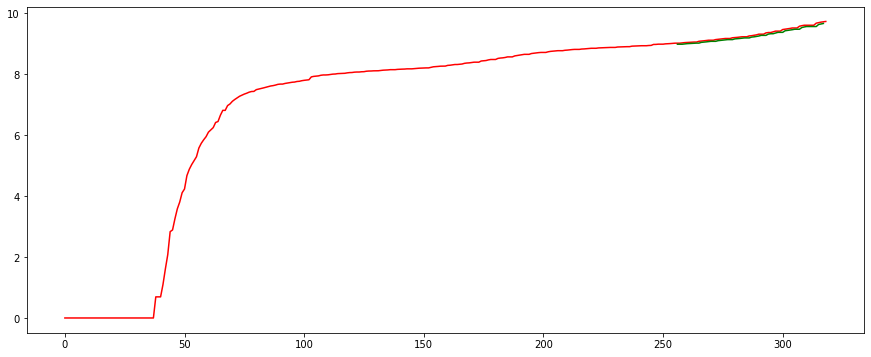

In [30]:
# shift train predictions for plotting
trainPredictPlotL = np.empty_like(datasetL)
trainPredictPlotL[:, :] = np.nan
trainPredictPlotL[look_back:len(trainPredictL)+look_back, :] = trainPredictL
# shift test predictions for plotting
testPredictPlotL = np.empty_like(datasetL)
testPredictPlotL[:, :] = np.nan
testPredictPlotL[len(trainPredictL)+(look_back*2)+1:len(dataset)-1, :] = testPredictL
# plot baseline and predictions
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)
plt.plot(scaler.inverse_transform(datasetL), color="red", label="actual")
plt.plot(testPredictPlotL, color="Green", label="prediction")
plt.show()

Stacked LSTM

In [31]:
from random import random
from numpy import array
from numpy import cumsum
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

In [32]:
# split into train and test sets
train_sizeS = int(len(datasetS) * 0.67)
test_sizeS = len(datasetS) - train_sizeS
trainS, testS = datasetS[0:train_sizeS,:], datasetS[train_sizeS:len(datasetS),:]
# reshape into X=t and Y=t+1
look_backS = 3
trainXS, trainYS = create_dataset(trainS, look_backS)
testXS, testYS = create_dataset(testS, look_backS)
# reshape input to be [samples, time steps, features]
trainXS = np.reshape(trainXS, (trainXS.shape[0], trainXS.shape[1], 1))
testXS = np.reshape(testXS, (testXS.shape[0], testXS.shape[1], 1))
# create and fit the LSTM network
batch_sizeS = 1
model = Sequential()
model.add(LSTM(16, activation='relu', batch_input_shape=(batch_sizeS, look_backS, 1), stateful=True, return_sequences=True))
model.add(LSTM(16, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(500):
	model.fit(trainXS, trainYS, epochs=1, batch_size=batch_sizeS, verbose=2, shuffle=False)
	model.reset_states()

209/209 - 3s - loss: 0.0379 - 3s/epoch - 14ms/step
209/209 - 1s - loss: 0.0136 - 1s/epoch - 6ms/step
209/209 - 1s - loss: 0.0092 - 1s/epoch - 6ms/step
209/209 - 1s - loss: 0.0065 - 1s/epoch - 6ms/step
209/209 - 1s - loss: 0.0055 - 1s/epoch - 6ms/step
209/209 - 1s - loss: 0.0045 - 1s/epoch - 6ms/step
209/209 - 1s - loss: 0.0034 - 1s/epoch - 6ms/step
209/209 - 1s - loss: 0.0028 - 1s/epoch - 6ms/step
209/209 - 1s - loss: 0.0023 - 1s/epoch - 6ms/step
209/209 - 1s - loss: 0.0020 - 1s/epoch - 6ms/step
209/209 - 1s - loss: 0.0019 - 1s/epoch - 6ms/step
209/209 - 1s - loss: 0.0018 - 1s/epoch - 6ms/step
209/209 - 1s - loss: 0.0015 - 1s/epoch - 6ms/step
209/209 - 1s - loss: 0.0014 - 1s/epoch - 6ms/step
209/209 - 1s - loss: 0.0014 - 1s/epoch - 6ms/step
209/209 - 1s - loss: 0.0013 - 1s/epoch - 6ms/step
209/209 - 1s - loss: 0.0012 - 1s/epoch - 6ms/step
209/209 - 1s - loss: 0.0011 - 1s/epoch - 6ms/step
209/209 - 1s - loss: 0.0011 - 1s/epoch - 6ms/step
209/209 - 1s - loss: 0.0010 - 1s/epoch - 6ms/step

In [33]:
# make predictions
trainPredictS = model.predict(trainXS, batch_size=batch_sizeS)
model.reset_states()
testPredictS = model.predict(testXS, batch_size=batch_sizeS)
# invert predictions
trainPredictS = scaler.inverse_transform(trainPredictS)
trainYS = scaler.inverse_transform([trainYS])
testPredictS = scaler.inverse_transform(testPredictS)
testYS = scaler.inverse_transform([testYS])
# calculate root mean squared error
trainScoreS = math.sqrt(mean_squared_error(trainYS[0], trainPredictS[:,0]))
print('Train Score: %.2f RMSE' % (trainScoreS))
testScoreS = math.sqrt(mean_squared_error(testYS[0], testPredictS[:,0]))
print('Test Score: %.2f RMSE' % (testScoreS))

Train Score: 0.14 RMSE
Test Score: 0.61 RMSE


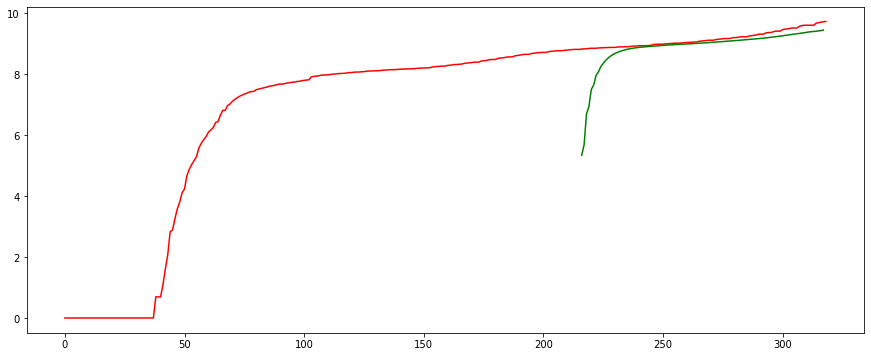

In [34]:
# shift train predictions for plotting
trainPredictPlotS = np.empty_like(datasetS)
trainPredictPlotS[:, :] = np.nan
trainPredictPlotS[look_backS:len(trainPredictS)+look_backS, :] = trainPredictS
# shift test predictions for plotting
testPredictPlotS = np.empty_like(datasetS)
testPredictPlotS[:, :] = np.nan
testPredictPlotS[len(trainPredictS)+(look_backS*2)+1:len(datasetS)-1, :] = testPredictS
# plot baseline and predictions
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)
plt.plot(scaler.inverse_transform(datasetS), color="red", label="actual")
plt.plot(testPredictPlotS, color="Green", label="prediction")
plt.show()

Bi-LSTM

In [35]:
# split into train and test sets
train_sizeB = int(len(datasetB) * 0.67)
test_sizeB = len(datasetB) - train_sizeB
trainB, testB = datasetB[0:train_sizeB,:], datasetB[train_sizeB:len(datasetB),:]
# reshape into X=t and Y=t+1
look_backB = 3
n_stepsB = 3
n_featuresB = 1
trainXB, trainYB = create_dataset(trainB, look_backB)
testXB, testYB = create_dataset(testB, look_backB)
# reshape input to be [samples, time steps, features]
trainXB = np.reshape(trainXB, (trainXB.shape[0], trainXB.shape[1], 1))
testXB = np.reshape(testXB, (testXB.shape[0], testXB.shape[1], 1))
# create and fit the LSTM network
batch_sizeB = 1
# define model
model = Sequential()
model.add(Bidirectional(LSTM(16, activation='tanh'), input_shape=(n_stepsB, n_featuresB)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
# fit model
model.fit(trainXB, trainYB, epochs=500, verbose=0)

In [36]:
# make predictions
trainPredictB = model.predict(trainXB, batch_size=batch_sizeB)
model.reset_states()
testPredictB = model.predict(testXB, batch_size=batch_sizeB)
# invert predictions
trainPredictB = scaler.inverse_transform(trainPredictB)
trainYB = scaler.inverse_transform([trainYB])
testPredictB = scaler.inverse_transform(testPredictB)
testYB = scaler.inverse_transform([testYB])
# calculate root mean squared error
trainScoreB = math.sqrt(mean_squared_error(trainYB[0], trainPredictB[:,0]))
print('Train Score: %.2f RMSE' % (trainScoreB))
testScoreB = math.sqrt(mean_squared_error(testYB[0], testPredictB[:,0]))
print('Test Score: %.2f RMSE' % (testScoreB))

Train Score: 0.13 RMSE
Test Score: 0.24 RMSE


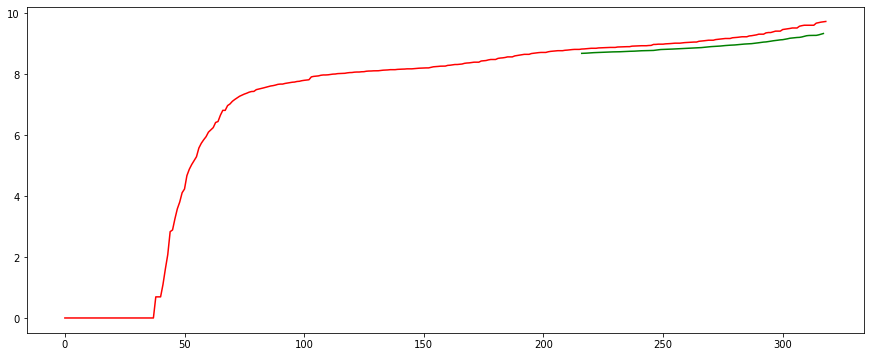

In [37]:
# shift train predictions for plotting
trainPredictPlotB = np.empty_like(datasetB)
trainPredictPlotB[:, :] = np.nan
trainPredictPlotB[look_backB:len(trainPredictB)+look_backB, :] = trainPredictB
# shift test predictions for plotting
testPredictPlotB = np.empty_like(datasetB)
testPredictPlotB[:, :] = np.nan
testPredictPlotB[len(trainPredictB)+(look_backB*2)+1:len(datasetB)-1, :] = testPredictB
# plot baseline and predictions
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)
plt.plot(scaler.inverse_transform(datasetB), color="red", label="actual")
plt.plot(testPredictPlotB, color="Green", label="prediction")
plt.show()

In [38]:
print(testY)

[0.9267823  0.9267823  0.92788019 0.92865031 0.92922111 0.92974056
 0.93058061 0.93058061 0.93058061 0.93315359 0.93380427 0.93474967
 0.93584554 0.9367274  0.9367274  0.9367274  0.93892154 0.93979935
 0.94062638 0.94153278 0.94256961 0.94256961 0.94256961 0.94500781
 0.94559809 0.94639015 0.94741991 0.94835906 0.94835906 0.94835906
 0.95119454 0.95199328 0.95330448 0.95476929 0.95712209 0.95712209
 0.95712209 0.96145979 0.96267372 0.96267372 0.96497389 0.96740757
 0.96740757 0.96740757 0.97280813 0.97395846 0.97518899 0.97641261
 0.97801423 0.97801423 0.97801423 0.98389797 0.98581457 0.98727021
 0.98727021 0.98727021 0.98727021 0.98727021 0.99424136 0.99590633
 0.99771897 0.99867813]


In [39]:
testY = testY.reshape(1, -1)
testY22=scaler.inverse_transform(testY)
print(testY22)

[[9.0219605  9.0219605  9.03264808 9.04014499 9.04570155 9.0507583
  9.05893592 9.05893592 9.05893592 9.08398318 9.09031733 9.09952054
  9.11018849 9.11877318 9.11877318 9.11877318 9.14013248 9.14867771
  9.1567286  9.16555219 9.1756454  9.1756454  9.1756454  9.19938053
  9.2051268  9.21283725 9.22286165 9.23200401 9.23200401 9.23200401
  9.25960661 9.26738211 9.28014625 9.29440575 9.31730959 9.31730959
  9.31730959 9.35953594 9.37135317 9.37135317 9.39374468 9.41743584
  9.41743584 9.41743584 9.4700087  9.48120685 9.49318577 9.50509736
  9.52068861 9.52068861 9.52068861 9.57796515 9.59662266 9.61079294
  9.61079294 9.61079294 9.61079294 9.61079294 9.67865508 9.69486309
  9.71250863 9.72184576]]


In [40]:
testYReal = np.exp(testY22)
print(testYReal)

[[ 8283.  8283.  8372.  8435.  8482.  8525.  8595.  8595.  8595.  8813.
   8869.  8951.  9047.  9125.  9125.  9125.  9322.  9402.  9478.  9562.
   9659.  9659.  9659.  9891.  9948. 10025. 10126. 10219. 10219. 10219.
  10505. 10587. 10723. 10877. 11129. 11129. 11129. 11609. 11747. 11747.
  12013. 12301. 12301. 12301. 12965. 13111. 13269. 13428. 13639. 13639.
  13639. 14443. 14715. 14925. 14925. 14925. 14925. 14925. 15973. 16234.
  16523. 16678.]]


In [41]:
testPredictLSTM = np.exp(testPredictL)
print(testPredictLSTM)

[[ 8003.564 ]
 [ 8003.564 ]
 [ 8003.564 ]
 [ 8088.2144]
 [ 8148.1455]
 [ 8192.84  ]
 [ 8233.735 ]
 [ 8300.308 ]
 [ 8300.308 ]
 [ 8300.308 ]
 [ 8507.604 ]
 [ 8560.856 ]
 [ 8638.826 ]
 [ 8730.095 ]
 [ 8804.24  ]
 [ 8804.24  ]
 [ 8804.24  ]
 [ 8991.513 ]
 [ 9067.558 ]
 [ 9139.782 ]
 [ 9219.613 ]
 [ 9311.803 ]
 [ 9311.803 ]
 [ 9311.803 ]
 [ 9532.245 ]
 [ 9586.405 ]
 [ 9659.558 ]
 [ 9755.504 ]
 [ 9843.857 ]
 [ 9843.857 ]
 [ 9843.857 ]
 [10115.495 ]
 [10193.364 ]
 [10322.514 ]
 [10468.734 ]
 [10707.961 ]
 [10707.961 ]
 [10707.961 ]
 [11163.513 ]
 [11294.459 ]
 [11294.459 ]
 [11546.817 ]
 [11819.976 ]
 [11819.976 ]
 [11819.976 ]
 [12449.513 ]
 [12587.893 ]
 [12737.623 ]
 [12888.286 ]
 [13088.188 ]
 [13088.188 ]
 [13088.188 ]
 [13849.588 ]
 [14107.024 ]
 [14305.761 ]
 [14305.761 ]
 [14305.761 ]
 [14305.761 ]
 [14305.761 ]
 [15297.003 ]
 [15543.721 ]
 [15816.847 ]]


In [42]:
testPredictStackedLSTM = np.exp(testPredictS)
print(testPredictStackedLSTM)

[[  209.55125]
 [  294.61218]
 [  814.1647 ]
 [ 1029.941  ]
 [ 1811.6877 ]
 [ 2100.2722 ]
 [ 2867.7642 ]
 [ 3242.54   ]
 [ 3847.0728 ]
 [ 4263.173  ]
 [ 4707.086  ]
 [ 5073.31   ]
 [ 5407.3804 ]
 [ 5690.5356 ]
 [ 5941.718  ]
 [ 6152.4556 ]
 [ 6353.012  ]
 [ 6499.8745 ]
 [ 6660.1855 ]
 [ 6779.199  ]
 [ 6887.289  ]
 [ 6979.228  ]
 [ 7080.8994 ]
 [ 7132.4414 ]
 [ 7223.126  ]
 [ 7279.57   ]
 [ 7336.426  ]
 [ 7381.5024 ]
 [ 7425.2065 ]
 [ 7469.903  ]
 [ 7495.622  ]
 [ 7584.8457 ]
 [ 7582.582  ]
 [ 7680.7617 ]
 [ 7700.1826 ]
 [ 7751.0645 ]
 [ 7796.2285 ]
 [ 7817.513  ]
 [ 7868.2095 ]
 [ 7899.7964 ]
 [ 7941.379  ]
 [ 7965.8105 ]
 [ 8003.0537 ]
 [ 8042.7017 ]
 [ 8064.9375 ]
 [ 8104.993  ]
 [ 8141.062  ]
 [ 8182.2603 ]
 [ 8203.872  ]
 [ 8242.228  ]
 [ 8308.528  ]
 [ 8318.019  ]
 [ 8388.663  ]
 [ 8436.407  ]
 [ 8488.42   ]
 [ 8529.807  ]
 [ 8576.931  ]
 [ 8646.8545 ]
 [ 8675.128  ]
 [ 8741.117  ]
 [ 8798.936  ]
 [ 8858.767  ]
 [ 8904.259  ]
 [ 8950.788  ]
 [ 9015.735  ]
 [ 9054.691  ]
 [ 9120.80

In [43]:
testPredictBiLSTM = np.exp(testPredictB)
print(testPredictBiLSTM)

[[ 5928.6367]
 [ 5946.4907]
 [ 5970.755 ]
 [ 6005.78  ]
 [ 6034.158 ]
 [ 6066.753 ]
 [ 6087.6763]
 [ 6097.3555]
 [ 6114.8022]
 [ 6139.221 ]
 [ 6170.    ]
 [ 6189.3955]
 [ 6209.3374]
 [ 6222.171 ]
 [ 6228.779 ]
 [ 6228.779 ]
 [ 6250.373 ]
 [ 6278.045 ]
 [ 6312.3374]
 [ 6330.097 ]
 [ 6342.7085]
 [ 6347.362 ]
 [ 6374.113 ]
 [ 6406.125 ]
 [ 6442.3945]
 [ 6459.288 ]
 [ 6478.3325]
 [ 6491.5366]
 [ 6497.402 ]
 [ 6509.533 ]
 [ 6527.3687]
 [ 6596.537 ]
 [ 6658.731 ]
 [ 6725.628 ]
 [ 6741.361 ]
 [ 6753.961 ]
 [ 6771.5293]
 [ 6795.654 ]
 [ 6828.493 ]
 [ 6854.1147]
 [ 6886.9478]
 [ 6910.336 ]
 [ 6923.0015]
 [ 6941.4326]
 [ 6973.806 ]
 [ 7015.357 ]
 [ 7047.2153]
 [ 7080.42  ]
 [ 7104.255 ]
 [ 7118.4023]
 [ 7162.7744]
 [ 7220.936 ]
 [ 7293.5786]
 [ 7341.647 ]
 [ 7394.1494]
 [ 7429.846 ]
 [ 7445.3164]
 [ 7484.7134]
 [ 7542.165 ]
 [ 7613.1597]
 [ 7661.4707]
 [ 7713.089 ]
 [ 7749.741 ]
 [ 7768.655 ]
 [ 7814.1816]
 [ 7873.336 ]
 [ 7945.31  ]
 [ 7991.811 ]
 [ 8045.4097]
 [ 8083.865 ]
 [ 8101.6626]
 [ 815

In [44]:
print(dataset)

[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.07120365]
 [0.07120365]
 [0.07120365]
 [0.11285512]
 [0.16532976]
 [0.21361096]
 [0.29104228]
 [0.29691389]
 [0.33468848]
 [0.36811754]
 [0.39104   ]
 [0.42229016]
 [0.43494925]
 [0.48001707]
 [0.50158659]
 [0.51742174]
 [0.53055345]
 [0.54375557]
 [0.57317862]
 [0.58895838]
 [0.6008728 ]
 [0.61128069]
 [0.62665622]
 [0.63420314]
 [0.64202969]
 [0.65932754]
 [0.66262558]
 [0.68381327]
 [0.70025026]
 [0.70013769]
 [0.71626207]
 [0.72179079]
 [0.73069864]
 [0.73

In [45]:
dataset=scaler.inverse_transform(dataset)
print(dataset)

[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.69314718]
 [0.69314718]
 [0.69314718]
 [1.09861229]
 [1.60943791]
 [2.07944154]
 [2.83321334]
 [2.89037176]
 [3.25809654]
 [3.58351894]
 [3.80666249]
 [4.11087386]
 [4.2341065 ]
 [4.67282883]
 [4.88280192]
 [5.0369526 ]
 [5.16478597]
 [5.29330482]
 [5.57972983]
 [5.73334128]
 [5.84932478]
 [5.95064255]
 [6.10031895]
 [6.1737861 ]
 [6.24997524]
 [6.41836494]
 [6.45047042]
 [6.65672652]
 [6.81673588]
 [6.81563999]
 [6.97260625]
 [7.02642681]
 [7.11314211]
 [7.17

In [46]:
data2 = np.exp(dataset)
print(data2)

[[1.0000e+00]
 [1.0000e+00]
 [1.0000e+00]
 [1.0000e+00]
 [1.0000e+00]
 [1.0000e+00]
 [1.0000e+00]
 [1.0000e+00]
 [1.0000e+00]
 [1.0000e+00]
 [1.0000e+00]
 [1.0000e+00]
 [1.0000e+00]
 [1.0000e+00]
 [1.0000e+00]
 [1.0000e+00]
 [1.0000e+00]
 [1.0000e+00]
 [1.0000e+00]
 [1.0000e+00]
 [1.0000e+00]
 [1.0000e+00]
 [1.0000e+00]
 [1.0000e+00]
 [1.0000e+00]
 [1.0000e+00]
 [1.0000e+00]
 [1.0000e+00]
 [1.0000e+00]
 [1.0000e+00]
 [1.0000e+00]
 [1.0000e+00]
 [1.0000e+00]
 [1.0000e+00]
 [1.0000e+00]
 [1.0000e+00]
 [1.0000e+00]
 [1.0000e+00]
 [2.0000e+00]
 [2.0000e+00]
 [2.0000e+00]
 [3.0000e+00]
 [5.0000e+00]
 [8.0000e+00]
 [1.7000e+01]
 [1.8000e+01]
 [2.6000e+01]
 [3.6000e+01]
 [4.5000e+01]
 [6.1000e+01]
 [6.9000e+01]
 [1.0700e+02]
 [1.3200e+02]
 [1.5400e+02]
 [1.7500e+02]
 [1.9900e+02]
 [2.6500e+02]
 [3.0900e+02]
 [3.4700e+02]
 [3.8400e+02]
 [4.4600e+02]
 [4.8000e+02]
 [5.1800e+02]
 [6.1300e+02]
 [6.3300e+02]
 [7.7800e+02]
 [9.1300e+02]
 [9.1200e+02]
 [1.0670e+03]
 [1.1260e+03]
 [1.2280e+03]
 [1.30

In [47]:
trainPredict2 = np.exp(trainPredictL)
print(trainPredict2)

[[1.0948367e+00]
 [1.0948367e+00]
 [1.0948367e+00]
 [1.0948367e+00]
 [1.0948367e+00]
 [1.0948367e+00]
 [1.0948367e+00]
 [1.0948367e+00]
 [1.0948367e+00]
 [1.0948367e+00]
 [1.0948367e+00]
 [1.0948367e+00]
 [1.0948367e+00]
 [1.0948367e+00]
 [1.0948367e+00]
 [1.0948367e+00]
 [1.0948367e+00]
 [1.0948367e+00]
 [1.0948367e+00]
 [1.0948367e+00]
 [1.0948367e+00]
 [1.0948367e+00]
 [1.0948367e+00]
 [1.0948367e+00]
 [1.0948367e+00]
 [1.0948367e+00]
 [1.0948367e+00]
 [1.0948367e+00]
 [1.0948367e+00]
 [1.0948367e+00]
 [1.0948367e+00]
 [1.0948367e+00]
 [1.0948367e+00]
 [1.0948367e+00]
 [1.0948367e+00]
 [1.0948367e+00]
 [1.0948367e+00]
 [1.0948367e+00]
 [2.6345956e+00]
 [2.6345956e+00]
 [2.6345956e+00]
 [4.2667971e+00]
 [7.5639310e+00]
 [1.2406498e+01]
 [2.6039377e+01]
 [2.7487370e+01]
 [3.8723965e+01]
 [5.2112053e+01]
 [6.3718422e+01]
 [8.3622246e+01]
 [9.3308578e+01]
 [1.3769141e+02]
 [1.6587074e+02]
 [1.9020560e+02]
 [2.1311584e+02]
 [2.3898831e+02]
 [3.0884766e+02]
 [3.5463867e+02]
 [3.9380777e+0

In [48]:
trainPredict3 = np.exp(trainPredictS)
print(trainPredict3)

[[1.1909294e+00]
 [1.1909294e+00]
 [1.1909294e+00]
 [1.1909294e+00]
 [1.1909294e+00]
 [1.1909294e+00]
 [1.1909294e+00]
 [1.1909294e+00]
 [1.1909294e+00]
 [1.1909294e+00]
 [1.1909294e+00]
 [1.1909294e+00]
 [1.1909294e+00]
 [1.1909294e+00]
 [1.1909294e+00]
 [1.1909294e+00]
 [1.1909294e+00]
 [1.1909294e+00]
 [1.1909294e+00]
 [1.1909294e+00]
 [1.1909294e+00]
 [1.1909294e+00]
 [1.1909294e+00]
 [1.1909294e+00]
 [1.1909294e+00]
 [1.1909294e+00]
 [1.1909294e+00]
 [1.1909294e+00]
 [1.1909294e+00]
 [1.1909294e+00]
 [1.1909294e+00]
 [1.1909294e+00]
 [1.1909294e+00]
 [1.1909294e+00]
 [1.1909294e+00]
 [1.1909294e+00]
 [2.2049682e+00]
 [2.4129055e+00]
 [3.0900168e+00]
 [5.1847744e+00]
 [8.9622545e+00]
 [1.6250097e+01]
 [2.3923046e+01]
 [3.0717617e+01]
 [4.2030785e+01]
 [5.3340088e+01]
 [6.7798553e+01]
 [8.6172432e+01]
 [1.0411712e+02]
 [1.3239645e+02]
 [1.5797136e+02]
 [1.9391396e+02]
 [2.2881400e+02]
 [2.6577643e+02]
 [3.1276001e+02]
 [3.5709854e+02]
 [4.1423184e+02]
 [4.6831439e+02]
 [5.2940601e+0

In [49]:
trainPredict4 = np.exp(trainPredictB)
print(trainPredict4)

[[1.08886921e+00]
 [1.08886921e+00]
 [1.08886921e+00]
 [1.08886921e+00]
 [1.08886921e+00]
 [1.08886921e+00]
 [1.08886921e+00]
 [1.08886921e+00]
 [1.08886921e+00]
 [1.08886921e+00]
 [1.08886921e+00]
 [1.08886921e+00]
 [1.08886921e+00]
 [1.08886921e+00]
 [1.08886921e+00]
 [1.08886921e+00]
 [1.08886921e+00]
 [1.08886921e+00]
 [1.08886921e+00]
 [1.08886921e+00]
 [1.08886921e+00]
 [1.08886921e+00]
 [1.08886921e+00]
 [1.08886921e+00]
 [1.08886921e+00]
 [1.08886921e+00]
 [1.08886921e+00]
 [1.08886921e+00]
 [1.08886921e+00]
 [1.08886921e+00]
 [1.08886921e+00]
 [1.08886921e+00]
 [1.08886921e+00]
 [1.08886921e+00]
 [1.08886921e+00]
 [1.08886921e+00]
 [1.40127206e+00]
 [1.84512162e+00]
 [2.43322611e+00]
 [2.81636500e+00]
 [3.96231651e+00]
 [6.66327810e+00]
 [1.25504417e+01]
 [2.00401764e+01]
 [3.02656956e+01]
 [3.92865791e+01]
 [5.38126068e+01]
 [7.17134857e+01]
 [8.92327957e+01]
 [1.18415146e+02]
 [1.52646637e+02]
 [1.97375977e+02]
 [2.30715530e+02]
 [2.62546814e+02]
 [3.10909210e+02]
 [3.713522

LSTM Final Plot

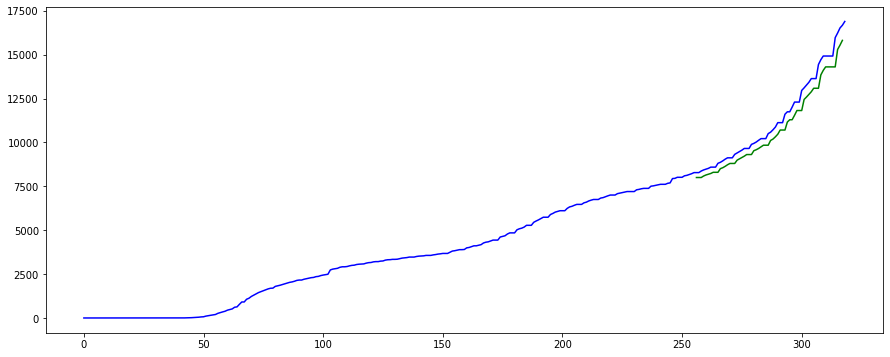

In [50]:
# shift train predictions for plotting
trainPredictPlot2 = np.empty_like(datasetL)
trainPredictPlot2[:, :] = np.nan
trainPredictPlot2[look_back:len(trainPredictL)+look_back, :] = trainPredict2
# shift test predictions for plotting
testPredictPlot2 = np.empty_like(dataset)
testPredictPlot2[:, :] = np.nan
testPredictPlot2[len(trainPredictL)+(look_back*2)+1:len(datasetL)-1, :] = testPredictLSTM
# plot baseline and predictions
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)
plt.plot(data2, color="blue", label="actual")
plt.plot(testPredictPlot2, color="Green", label="prediction")
plt.show()

Stacked LSTM Final Plot

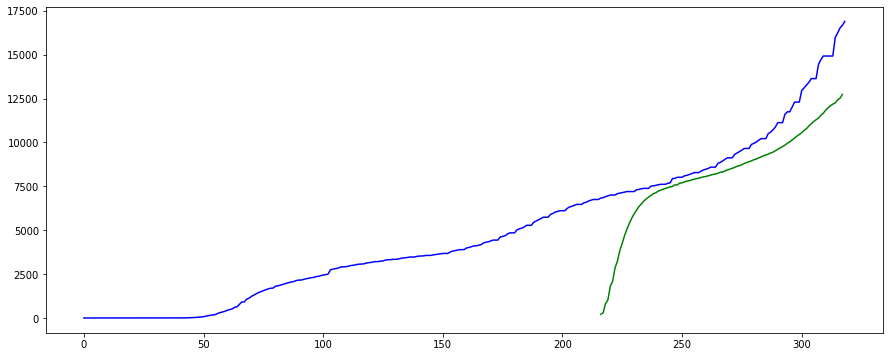

In [51]:
# shift train predictions for plotting
trainPredictPlot3 = np.empty_like(datasetS)
trainPredictPlot3[:, :] = np.nan
trainPredictPlot3[look_backS:len(trainPredictS)+look_backS, :] = trainPredict3
# shift test predictions for plotting
testPredictPlot3 = np.empty_like(dataset)
testPredictPlot3[:, :] = np.nan
testPredictPlot3[len(trainPredictS)+(look_backS*2)+1:len(datasetS)-1, :] = testPredictStackedLSTM
# plot baseline and predictions
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)
plt.plot(data2, color="blue", label="actual")
plt.plot(testPredictPlot3, color="Green", label="prediction")
plt.show()

Bi-LSTM Final Plot

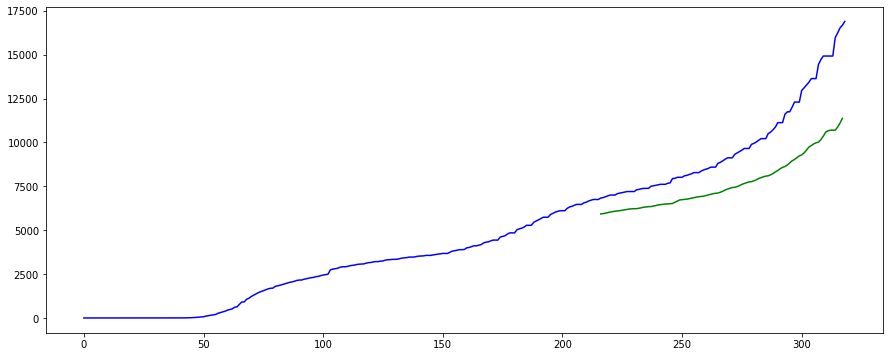

In [52]:
# shift train predictions for plotting
trainPredictPlot4 = np.empty_like(datasetB)
trainPredictPlot4[:, :] = np.nan
trainPredictPlot4[look_backB:len(trainPredictB)+look_backB, :] = trainPredict4
# shift test predictions for plotting
testPredictPlot4 = np.empty_like(datasetB)
testPredictPlot4[:, :] = np.nan
testPredictPlot4[len(trainPredictB)+(look_backB*2)+1:len(datasetB)-1, :] = testPredictBiLSTM
# plot baseline and predictions
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)
plt.plot(data2, color="blue", label="actual")
plt.plot(testPredictPlot4, color="Green", label="prediction")
plt.show()